<a href="https://colab.research.google.com/github/luanmoon/Praticas_de_machine_learning/blob/main/M%C3%A9todos_probabil%C3%ADsticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Cogumelos**
<font size=3>

[Cogumelos](https://www.kaggle.com/datasets/uciml/mushroom-classification),
1. O melhor modelo é o Categorical NB, isso pois este método leva em conta dados discretos e categóricos, ou seja, várias informações para classificar um alvo, a probabilidade de um atributo ter uma categoria especifica dentro de uma classe.No caso do dataset de cogumelos, queremos classificar se são venenosos ou comestíveis a partir da características como tamanho, cor etc.Logo, o modelo se encaixa na especificação do dataset.
2. Uso das funções [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) e [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para transformar a variável de atributos (`X`) e alvo (`y`). Uso do [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
3. Treino do modelo com [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) a fim de ajustar seu(s) hiperparâmetro(s);
4. Predições e avaliaçãoes do modelo com dados de teste;
5. Uso das funções [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) e [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) para interpretar os resultados.
   

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv('/content/drive/MyDrive/IMD3002 - Aprendizado de Máquina Supervisionado/2ª unidade/dataset/mushrooms.csv')

df.head() # Dataset de cogumelos, objetivo é identificar se ele é comestível ou venesoso(Edible or poisonous)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

y = df['class']
X = df.drop(['class'], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


categorical_transformer = OrdinalEncoder() # converte dados categóricos ordinais em valores numéricos inteiros.
                                           #Para um mesmo tipo de dados com dimensões ou outras características diferentees.
cnb = CategoricalNB()




In [ ]:
pipe = Pipeline(steps=[('preprocessor', categorical_transformer), # Usa o pipeline para encadeamento vertical que já foi transformado no Ct, basta apenas coloca-lo no pipeline.
                       ('classifier', CategoricalNB())]) # Modelo a ser usado, no caso, CategoricalNb

pipe.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor', OrdinalEncoder()),
                ('classifier', CategoricalNB())])

In [ ]:
parametros = {       # Parâmetros do categoricalNB, alpha [0.1, 0.5, 1.0]. Para o parametro identificar o modelo, é preciso colocar o qual foi assimilado no pipeline.
                     #No caso, o classifier

    'classifier__alpha': [0.1, 0.5, 1.0],

}


grid_search = GridSearchCV(estimator=pipe,
                           param_grid=parametros,
                           cv=5,
                           scoring='accuracy',
                           verbose=1)



grid_search


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor', OrdinalEncoder()),
                                       ('classifier', CategoricalNB())]),
             param_grid={'classifier__alpha': [0.1, 0.5, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor', OrdinalEncoder()),
                                       ('classifier', CategoricalNB())]),
             param_grid={'classifier__alpha': [0.1, 0.5, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
print(f"Melhor score de acurácia (validação cruzada): {grid_search.best_score_:.4f}")

Melhores parâmetros encontrados: {'classifier__alpha': 0.1}
Melhor score de acurácia (validação cruzada): 0.9777


In [ ]:
y_pred = grid_search.predict(X_test)

acc = accuracy_score(y_test_encoded, y_pred)

print(f"Acurácia do melhor modelo: {acc:.2f}")

Acurácia do melhor modelo: 0.98


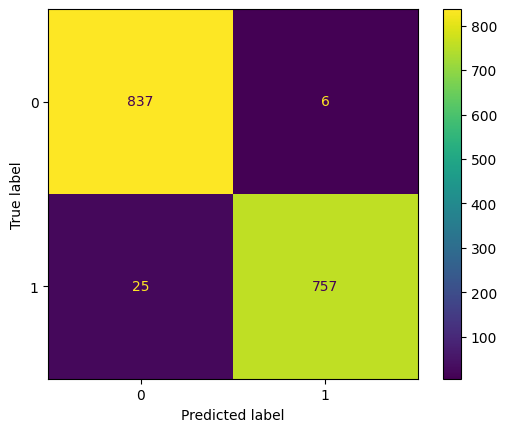

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test_encoded, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# 837 Verdadeiros positivos(VP)
# 757 Verdadeiros negativos(VN)
# 6 Falsos positivos(FP)
# 25 Falsos negativos(FN)

In [ ]:
print("Matriz de confusão:\n", confusion_matrix(y_test_encoded, y_pred))

Matriz de confusão:
 [[837   6]
 [ 25 757]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       843
           1       0.99      0.97      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precisão: {precision_score(y_test_encoded, y_pred):.2f}")
print(f"Sensibilidade: {recall_score(y_test_encoded, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test_encoded, y_pred):.2f}")

Precisão: 0.99
Sensibilidade: 0.97
F1-score: 0.98


 Analisando os resultados, há que 837 foram verdadeiros positivos, 757 foram verdadeiros negativos, 25 foram falsos negativos e 6 foram falsos positivos. 99% das ditas positivas eram realmente positivas(precisão), dentre elas, 97% foram prevista corretamente(sensibilidade) e tem uma média harmônica de 98%. Nessa questão da classificação de cogumelos, é essencial que o modelo tenha uma alta precisão, pois ela leva em conta os falsos positivos, e classificar erroneamente um cogumelo venenoso em comestível é muito mais sério que um modelo sensível. Portanto, ele se sucedeu em ambas as avaliações, tendo um êxito melhor na precisão, o que para o dataset em questão, é ótimo devido ao contexto.

### **Spams**
<font size=3>

 [Spams](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset),
1. I variável `encoding = 'latin-1'` na função `read_csv()` importar corretamente os dados textuais;
2. O melhor modelo naive bayes é o Multinomial NB, isso pois ele é usado para dados que representam contagens ou frequências, assim, é a probabilidade de um atributo ser estimado em uma classe a partir de sua frequência relativa suavizada. Como o dataset de spam é analisada a frequência de dados para classífica-lo como spam, este modelo é o que melhor se encaixa.
3.  Os dados de **_spam_** e **_ham_** (não spam) são a variável alvo, e os dados textuais como a variável de atributos;
4. Uso do [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) para processar os dados textuais e [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para transformar a variável alvo. Uso do  [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
5. Treino do modelo com [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) a fim de ajustar seu(s) hiperparâmetro(s);
6. Predições e avaliaçãoes do modelo com dados de teste;
7. Uso as funções [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) e [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) para interpretar os resultados.
    

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IMD3002 - Aprendizado de Máquina Supervisionado/2ª unidade/dataset/spam.csv', encoding = 'latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

y = df['v1'] # Alvo: Spams ou não Spams
X = df['v2'] # Os textos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


categorical_transformer = CountVectorizer() #transforma uma coleção de documentos de texto em uma matriz de contagens de tokens (palavras).
                                            # constrói um vocabulário de todas as palavras únicas encontradas nos documentos.
clf = MultinomialNB()

In [ ]:
pipe = Pipeline(steps=[('preprocessor', categorical_transformer),
                       ('classifier', MultinomialNB())])

pipe.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [ ]:
parametros = {
    'classifier__alpha': [0.1, 0.5, 1.0],
}


grid_search = GridSearchCV(estimator=pipe,
                           param_grid=parametros,
                           cv=5,
                           scoring='accuracy',
                           verbose=1)



grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor', CountVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.1, 0.5, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor', CountVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.1, 0.5, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
print(f"Melhor score de acurácia (validação cruzada): {grid_search.best_score_:.4f}")

Melhores parâmetros encontrados: {'classifier__alpha': 0.1}
Melhor score de acurácia (validação cruzada): 0.9870


In [ ]:
y_pred = grid_search.predict(X_test)

acc = accuracy_score(y_test_encoded, y_pred)

print(f"Acurácia do melhor modelo: {acc:.2f}")

Acurácia do melhor modelo: 0.98


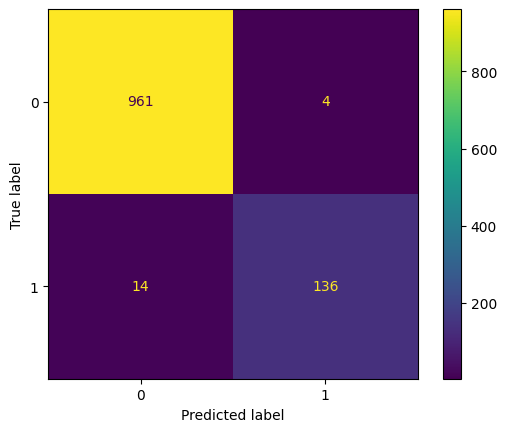

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# criando a matriz de confusão:
cm = confusion_matrix(y_test_encoded, y_pred)

# exibindo a matriz de confusão:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print("Matriz de confusão:\n", confusion_matrix(y_test_encoded, y_pred))

Matriz de confusão:
 [[961   4]
 [ 14 136]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.97      0.91      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precisão: {precision_score(y_test_encoded, y_pred):.2f}")
print(f"Sensibilidade: {recall_score(y_test_encoded, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test_encoded, y_pred):.2f}")

Precisão: 0.97
Sensibilidade: 0.91
F1-score: 0.94


 Analisando os resultados, há que 961 foram verdadeiros positivos, 136 foram verdadeiros negativos, 14 foram falsos negativos e 4 foram falsos positivos. 97% das ditas positivas eram realmente positivas(precisão), dentre elas, 91% foram prevista corretamente(sensibilidade) e tem uma média harmônica de 94%.Dessa forma, é possível observar que o modelo é mais preciso que sensível, para o dataset em questão, filtro de spam, o melhor modelo de fato é um com alta precisão pois classificar um email importante como spam, falso positivo, sai muito mais caro que o contrário. Portanto, o modelo diferiu mais entre as avaliações, sendo mais preciso que sensível, o que para o dataset em questão é ótimo pois requer maior precisão para a questão do filtro de spam.  